## **Exploring the Documents File to Find Potential Text Instruments**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
matched_docs = pd.read_csv('/content/drive/MyDrive/ECO225_Final_Project/DATA/matched_documents.csv')

In [15]:
matched_docs[matched_docs['cleaned_text'].str.contains(r'order|judgment', regex=True)]

,case_row_id,case_number,case_number_raw,district_id,doc_count,doc_number,short_description,long_description,attachment,doc_date_filed,doc_date_uploaded,document_url,cleaned_text
2,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,2,28.0,NaN,"ORDER, for permanent injunction ( signed by Judge Leonard D. Wexler ) dtd 2/25/92 that defts shall pay Littelfuse the sum of five thousand dollars; deft, its officers, etc. are permanently enjoined from infringing US Trademark Registrations Nos. 1,413,357 and 1,553,579 and any unauthorized use of the Littelfuse Cartridge Fuseholder Trade Dress,etc. c/m (Sapienza, Lorraine) (Entered: 02/26/1992)",NaN,1992-02-25,NaN,NaN,order permanent injunction sign judge leonard wexler dtd 2/25/92 deft shall pay littelfuse sum dollar deft officer etc permanently enjoin infringe trademark registrations nos unauthorized use littelfuse cartridge fuseholder trade dress etc sapienza lorraine enter 02/26/1992
3,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,3,27.0,NaN,"ORDER withdrawing [5-1] motion for preliminary injunction ( signed by Judge Leonard D. Wexler ) dtd 11/25/91 on stip of parties. c/m (Sapienza, Lorraine) (Entered: 11/26/1991)",NaN,1991-11-26,NaN,NaN,order withdraw motion preliminary injunction sign judge leonard wexler dtd 11/25/91 stip party sapienza lorraine enter 11/26/1991
4,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,4,26.0,NaN,"ORDER dtd. 10/30/91, pltff. & deft. to discuss settlement in good faith; until 11/21/91 defts shall not sell any fuses or fuseholders ( signed by Magistrate David F. Jordan ) c/m (Bollbach, Jean) (Entered: 10/31/1991)",NaN,1991-10-30,NaN,NaN,order dtd 10/30/91 pltff deft discuss settlement good faith 11/21/91 deft shall sell fuse fuseholder sign magistrate david jordan bollbach jean enter 10/31/1991
8,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,8,21.0,NaN,"ORDER dtd. 10/7/91 mooting [4-1] motion to accelerate discovery ( signed by Magistrate David F. Jordan ) c/m (Bollbach, Jean) (Entered: 10/16/1991)",NaN,1991-10-07,NaN,NaN,order dtd 10/7/91 moot motion accelerate discovery sign magistrate david jordan bollbach jean enter 10/16/1991
9,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,9,19.0,NaN,"ORDER dtd. 10/17/91 granting [19-1] motion to extend time granting [19-2] motion Motion hearing set for 9/26/91 [5-1] motion for preliminary injunction ( signed by Judge Leonard D. Wexler ) c/m (Bollbach, Jean) (Entered: 10/18/1991)",NaN,1991-10-03,NaN,NaN,order dtd 10/17/91 grant motion extend time grant motion motion hearing set 9/26/91 motion preliminary injunction sign judge leonard wexler bollbach jean enter 10/18/1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984499,103265.0,4:13-cv-04201,4:13-cv-04201-PJH,cand,374,147.0,NaN,"Minute Entry for proceedings held before Hon. Ronald M. Whyte: Motion Hearing held on 7/28/2015 Re 188 in 5:13-cv-04513-RMW - MOTION to Dismiss DEFENDANTS' MOTION TO DISMISS AND MOTION FOR JUDGMENT ON THE PLEADINGS filed by Apple Inc. COURT ACTION: The Court heard oral argument from the parties and took the matter under submission. The Court to issue a written ruling. The matter is deemed submitted. Court Reporter Name: Kimberly Thorpe. Court Time: [10:02 to 10:50]. Plaintiff Attorney: A. Patek, T. Kennedy. Defendant Attorney: M. Meger (Yelp & Twitter); P. King (Apple); H. Keefe, R. Chen, C. Stretch (Facebook); E. Carnevale (Foursquare); T. Duston (Groupon); J. Sigale (LivingSocial); N. Cummings, C. Campbell (Millennial Media); J. Heidrick (Sprint). This is a text only Minute Entry (jgS, COURT STAFF) (Date Filed: 7/28/2015) (Entered: 08/03/2015)",NaN,2015-07-28,2015-08-03,NaN,minute entry proceeding hold hon ronald whyte motion hearing hold 7/28/2015 5:13 cv-04513 rmw motion dismiss defendant motion dismiss motion judgment pleading file apple inc. court action court hear oral argument party take matter submission court issue write ruling matter deem submit court reporter kimberly thorpe court time 10:02 10:50 plaintiff attorney patek ke

In [16]:
excluded_words = [
    "damage", "fine", "compensation", "settlement", "award", "restitution",
    "penalty", "cost", "sanction", "remedy", "reimbursement", "indemnity", "liability",
    "fee", "expense", "attorney fee", "legal fee", "court cost", "filing fee", "litigation cost",
    "settle", "compel", "impose", "enforce", "assess",
    "profit", "loss", "revenue", "sale", "earning", "investment", "valuation",
    "shareholder", "dividend", "stock", "merger", "acquisition", "order",
    "judgment", "case closed", "closed", "dismissed", "transferred out",
    "transferred", "magistrate", "attorney", "judge"
]

import re
# Construct regex pattern for excluded words
pattern = r'\b(' + '|'.join(re.escape(word) for word in excluded_words) + r')\b'

# Filter matched_docs for rows that do NOT contain excluded words
no_order_judgment = matched_docs[
    ~matched_docs['cleaned_text'].str.contains(pattern, regex=True, case=False, na=False)
]

# Apply the same exclusion filter on no_order_judgment
no_order_judgment = no_order_judgment[
    ~no_order_judgment['long_description'].str.contains(pattern, regex=True, case=False, na=False)
]

# Remove "(Entered: MM/DD/YYYY)" pattern
no_order_judgment['long_description'] = no_order_judgment['long_description'].str.replace(
    r"\(Entered: \d{2}/\d{2}/\d{4}\)", "", regex=True
)

# Remove standalone dates (MM/DD/YYYY)
no_order_judgment['long_description'] = no_order_judgment['long_description'].str.replace(
    r"\b\d{2}/\d{2}/\d{4}\b", "", regex=True
)


<ipython-input-16-2a4b97b9ed5c>:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~matched_docs['cleaned_text'].str.contains(pattern, regex=True, case=False, na=False)
<ipython-input-16-2a4b97b9ed5c>:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~no_order_judgment['long_description'].str.contains(pattern, regex=True, case=False, na=False)


In [17]:
no_order_judgment = no_order_judgment.drop(columns=['case_number_raw',
                                                      'district_id',
                                                      'short_description',
                                                      'attachment',
                                                      'doc_date_filed',
                                                      'doc_date_uploaded',
                                                      'document_url'])

In [18]:
no_order_judgment['doc_count'].describe()

,doc_count
count,632096.000000
mean,486.624847
std,695.853261
min,1.000000
25%,53.000000
50%,196.000000
75%,626.000000
max,5760.000000


In [19]:
no_order_judgment

,case_row_id,case_number,doc_count,doc_number,long_description,cleaned_text
0,22.0,0:87-cv-06504,1,9.0,COPY OF PAPER DOCKET SHEET (Former Deputy Clerk),copy paper docket sheet deputy clerk enter 05/02/2003
5,43.0,0:90-cv-04396,5,24.0,"LTR. dtd. 10/9/91 to Wexler from Robert Wagner RE: in response to Mr. Badies letter of 9/25/91. (Bollbach, Jean)",ltr dtd 10/9/91 wexler robert wagner response mr. badies letter 9/25/91 bollbach jean enter 10/16/1991
6,43.0,0:90-cv-04396,6,23.0,"LTR. dtd. 10/1/91 to Wexler from Richard Himelhoch RE: Robert Wagner is out of the country and is expected back 10/9/91 and at that time he will respond to James Badies ex parte communication. (Bollbach, Jean)",ltr dtd 10/1/91 wexler richard himelhoch robert wagner country expect 10/9/91 time respond james badies parte communication bollbach jean enter 10/16/1991
7,43.0,0:90-cv-04396,7,22.0,"REPLY by K.I.C. Corp., Triad Electric in opposition to [5-1] motion for preliminary injunction (Bollbach, Jean)",reply k.i.c. corp. triad electric opposition motion preliminary injunction bollbach jean enter 10/16/1991
10,43.0,0:90-cv-04396,10,20.0,"REPLY by LittleFuse, Inc. in response to defts opposition to pltff's motion for preliminary injunction. (Bollbach, Jean)",reply littlefuse inc. response deft opposition pltff motion preliminary injunction bollbach jean enter 10/16/1991
...,...,...,...,...,...,...
984502,103265.0,4:13-cv-04201,377,150.0,"CLERK'S NOTICE OF CONTINUANCE OF CASE MANAGEMENT CONFERENCE. (This is a text-only entry generated by the court. There is no document associated with this entry.) Case Management Conference reset for 02:00 PM in Courtroom 6, 4th Floor, San Jose. (jgS, COURT STAFF) (Filed on 9/4/2015)",clerk notice continuance case management conference text entry generate court document associate entry case management conference reset 10/20/2015 02:00 courtroom floor san jose jgs court staff file 9/4/2015 enter 09/04/2015
984506,103265.0,4:13-cv-04201,381,154.0,"NOTICE OF APPEAL to the Federal Circuit by Evolutionary Intelligence, LLC. Pay.gov Agency Tracking ID 25O81LIE. Appeal Record due by 12/3/2015. (Patek, Anthony) (Filed on 11/4/2015)",notice appeal federal circuit evolutionary intelligence llc pay.gov agency tracking 25o81lie appeal record 12/3/2015 patek anthony file 11/4/2015 enter 11/04/2015
984508,103265.0,4:13-cv-04201,383,156.0,"USCA Case Number 16-1190 as to 154 Notice of Appeal to the Federal Circuit filed by Evolutionary Intelligence, LLC Date of docketing. See Fed. Cir. R. 12. Entry of appearance. (Due within 14 days of the date of docketing.) See Fed. Cir. R. 47.3. Certificate of interest. (Due within 14 days of the date of docketing.) See Fed. Cir. R. 47.4. Docketing Statement. (Due within 14 days of the date of docketing, or within 30 days if the United States or its officer or agency is a party in the appeal.) (bwS, COURT STAFF) (Filed on )",usca case number notice appeal federal circuit file evolutionary intelligence llc date docket fed cir entry appearance day date docketing fed cir certificate interest day date docketing fed cir docketing statement day date docketing day united states officer agency party appeal bws court staff file 11/12/2015 enter 11/12/2015
984509,103265.0,4:13-cv-04201,384,156.0,missing a description,miss description


In [20]:
BERT_Training = no_order_judgment.groupby('case_number')['long_description'].agg(' '.join).reset_index()

BERT_Training = (
    no_order_judgment.assign(doc_number=no_order_judgment['doc_number'].fillna(99999))  # Replace NaNs with a large value
    .sort_values(['case_number', 'doc_number'])  # Sort by case then doc order
    .groupby('case_number')['long_description']
    .agg('. '.join)  # Concatenate in order
    .reset_index()
)

In [21]:
merged_cases_JFC = pd.read_csv('/content/drive/MyDrive/ECO225_Final_Project/DATA/clean_cases_JFC.csv')
outcomes = merged_cases_JFC[['case_row_id', 'case_number', 'case_name',
                             'disp_dismissed']]

In [22]:
BERT_Training = BERT_Training.merge(outcomes, on='case_number', how='inner')

In [23]:
pd.set_option('display.max_colwidth', None)
BERT_Training.head()

case_number  \
0  0:10-cv-02202   
1  0:10-cv-03601   
2  0:10-cv-03989   
3  0:10-cv-60674   
4  0:10-cv-60677   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Training LegalBERT to Classify cases by disp_dispose = 0,1

In [24]:
!pip install datasets
import torch
import pandas as pd
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [25]:
# Select only needed columns
BERT_Training = BERT_Training[['case_number','long_description', 'disp_dismissed']].dropna()

# Train-test split (stratified to balance dismissals)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    BERT_Training['long_description'].tolist(),
    BERT_Training['disp_dismissed'].tolist(),
    test_size=0.2,
    stratify=BERT_Training['disp_dismissed'],
    random_state=42
)

# Convert to Hugging Face Dataset format
dataset = DatasetDict({
    'train': Dataset.from_dict({'text': train_texts, 'label': train_labels}),
    'validation': Dataset.from_dict({'text': val_texts, 'label': val_labels})
})

In [26]:
# Load LegalBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")

# Tokenization function
def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=512)

# Apply tokenization
dataset = dataset.map(tokenize, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/6510 [00:00<?, ? examples/s]

Map:   0%|          | 0/1628 [00:00<?, ? examples/s]

In [28]:
# Load LegalBERT model for classification
model = AutoModelForSequenceClassification.from_pretrained("nlpaueb/legal-bert-base-uncased", num_labels=2)

#drop outs to avoid overfitting
model.config.hidden_dropout_prob = 0.1
model.config.attention_probs_dropout_prob = 0.1

from torch.nn import CrossEntropyLoss
import torch

# Compute class weights
num_class_0 = (BERT_Training['disp_dismissed'] == 0).sum()
num_class_1 = (BERT_Training['disp_dismissed'] == 1).sum()
total = num_class_0 + num_class_1

weight_0 = total / (2 * num_class_0)
weight_1 = total / (2 * num_class_1)

class_weights = torch.tensor([weight_0, weight_1]).to("cuda")

# Apply weighted loss function to the model
loss_fn = CrossEntropyLoss(weight=class_weights)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
!pip install evaluate
from evaluate import load  # Fix for deprecated load_metric

accuracy_metric = load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)  # Convert logits to class labels (0 or 1)
    return accuracy_metric.compute(predictions=predictions, references=labels)


training_args = TrainingArguments(
    output_dir="./legalbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_accuracy"  # Ensure it's tracked
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics  # Ensures accuracy is tracked
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-30-fbb1d23ce504>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [31]:
import torch

if torch.cuda.is_available():
    gpu_info = torch.cuda.get_device_name(0)
    print(f"✅ Running on GPU: {gpu_info}")
else:
    print("❌ No GPU detected. Change runtime to GPU in Colab.")

✅ Running on GPU: NVIDIA A100-SXM4-40GB


In [32]:
from transformers import logging

# Show progress bar in detail
logging.set_verbosity_info()

#ensuring training happens on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"

# Train LegalBERT
trainer.train()

# Save model & tokenizer after training
trainer.save_model("./legalbert_trained")
tokenizer.save_pretrained("./legalbert_trained")

***** Running training *****
  Num examples = 6,510
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2,035
  Number of trainable parameters = 109,483,778
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.499000,0.479723,0.768428
2,0.430400,0.479130,0.770885
3,0.451500,0.502657,0.752457
4,0.298500,0.591984,0.762285
5,0.213600,0.617139,0.743857



***** Running Evaluation *****
  Num examples = 1628
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
Saving model checkpoint to ./legalbert_results/checkpoint-407
Configuration saved in ./legalbert_results/checkpoint-407/config.json
Model weights saved in ./legalbert_results/checkpoint-407/model.safetensors
tokenizer config file saved in ./legalbert_results/checkpoint-407/tokenizer_config.json
Special tokens file saved in ./legalbert_results/checkpoint-407/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 1628
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.for

('./legalbert_trained/tokenizer_config.json',
 './legalbert_trained/special_tokens_map.json',
 './legalbert_trained/vocab.txt',
 './legalbert_trained/added_tokens.json',
 './legalbert_trained/tokenizer.json')

In [33]:
metrics = trainer.evaluate()
print(metrics)


***** Running Evaluation *****
  Num examples = 1628
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


{'eval_loss': 0.47912994027137756, 'eval_accuracy': 0.7708845208845209, 'eval_runtime': 11.4572, 'eval_samples_per_second': 142.094, 'eval_steps_per_second': 8.903, 'epoch': 5.0}


# With BERT trained with 77% accuracy, we can now Forward Push the Text to get our instrumented disp_dismissed variable

In [34]:
# Check if BERT_Training has the correct column
if "long_description" not in BERT_Training.columns:
    raise ValueError("⚠️ 'long_description' column missing from BERT_Training!")

# Convert text data to list
bert_texts = BERT_Training['long_description'].tolist()

# Tokenize for LegalBERT
bert_dataset = Dataset.from_dict({"text": bert_texts})
bert_dataset = bert_dataset.map(lambda batch: tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512), batched=True)

Map:   0%|          | 0/8138 [00:00<?, ? examples/s]

In [35]:
# Run model inference
outputs = trainer.predict(bert_dataset)

# Extract logits
logits = outputs.predictions  # Raw model outputs before softmax


***** Running Prediction *****
  Num examples = 8138
  Batch size = 16
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


In [36]:
from scipy.special import softmax

# Convert logits to probabilities
probabilities = softmax(logits, axis=1)[:, 1]  # Keep only P(disp_dismissed=1)

In [37]:
BERT_Training["BERT_Logits"] = logits[:, 1]  # Second column of logits represents "dismissed=1" score
BERT_Training["BERT_Prob"] = probabilities  # Probabilities for dismissal

In [38]:
BERT_Training[['disp_dismissed',	'BERT_Logits', 'BERT_Prob']]

,disp_dismissed,BERT_Logits,BERT_Prob
0,1,1.852536,0.978525
1,0,0.291044,0.519688
2,1,0.540543,0.623941
3,0,0.185145,0.608320
4,0,0.280421,0.670353
...,...,...,...
8133,1,1.155742,0.907623
8134,1,1.077025,0.904742
8135,0,0.798845,0.762739
8136,1,0.630950,0.649016


In [39]:
BERT_Training['BERT_Dismissed'] = (BERT_Training['BERT_Prob'] > 0.5).astype(int)

In [40]:
len(BERT_Training[BERT_Training['disp_dismissed']	== BERT_Training['BERT_Dismissed']]) / len(BERT_Training)

0.7860653723273532

In [41]:
BERT_Predictions = BERT_Training.copy()
BERT_Predictions = BERT_Predictions.drop(columns=['long_description'])
BERT_Predictions

,case_number,disp_dismissed,BERT_Logits,BERT_Prob,BERT_Dismissed
0,0:10-cv-02202,1,1.852536,0.978525,1
1,0:10-cv-03601,0,0.291044,0.519688,1
2,0:10-cv-03989,1,0.540543,0.623941,1
3,0:10-cv-60674,0,0.185145,0.608320,1
4,0:10-cv-60677,0,0.280421,0.670353,1
...,...,...,...,...,...
8133,9:98-cv-04338,1,1.155742,0.907623,1
8134,9:98-cv-04877,1,1.077025,0.904742,1
8135,9:99-cv-01912,0,0.798845,0.762739,1
8136,9:99-cv-04639,1,0.630950,0.649016,1


In [42]:
BERT_Predictions.to_csv('BERT_Predictions.csv')

from google.colab import files
files.download('BERT_Predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
BERT_Predictions[BERT_Predictions['BERT_Dismissed'] == BERT_Predictions['disp_dismissed']]

,case_number,disp_dismissed,BERT_Logits,BERT_Prob,BERT_Dismissed
0,0:10-cv-02202,1,1.852536,0.978525,1
2,0:10-cv-03989,1,0.540543,0.623941,1
5,0:11-cv-00376,1,0.452359,0.808219,1
6,0:11-cv-00569,1,0.494279,0.790408,1
8,0:11-cv-00809,1,2.167538,0.989203,1
...,...,...,...,...,...
8132,9:98-cv-03843,1,0.541902,0.782650,1
8133,9:98-cv-04338,1,1.155742,0.907623,1
8134,9:98-cv-04877,1,1.077025,0.904742,1
8136,9:99-cv-04639,1,0.630950,0.649016,1


In [44]:
!pip install stargazer
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import display

# Define independent (X) and dependent (Y) variables
X = BERT_Predictions[['BERT_Logits']]
X = sm.add_constant(X)  # Adds intercept term
Y = BERT_Predictions[['disp_dismissed']]

# Run regression
model = sm.OLS(Y, X).fit()

# Display Stargazer output in Jupyter Notebook
stargazer = Stargazer([model])
display(stargazer)  # This will render the table properly in Jupyter

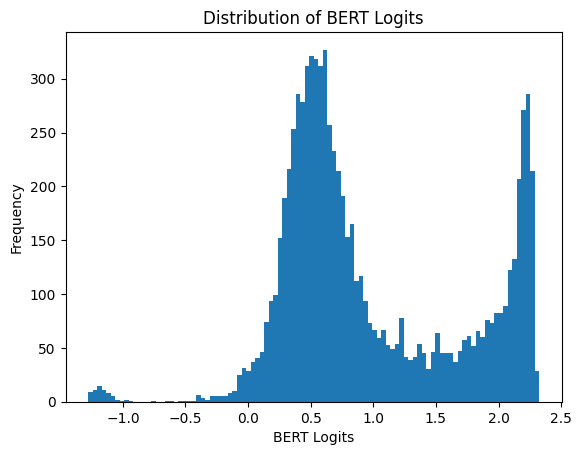

In [50]:
import matplotlib.pyplot as plt

plt.hist(BERT_Training['BERT_Logits'], bins=100)
plt.xlabel("BERT Logits")
plt.ylabel("Frequency")
plt.title("Distribution of BERT Logits")
plt.show()